# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset : https://www.kaggle.com/datasets/ardikasatria/datasettanamanpadisumatera/data **:  
   Dataset Tanaman Padi Sumatera, Indonesia
Dataset ini menyajikan data historis hasil produksi padi di Pulau Sumatera dari tahun 1993 hingga 2020. Data dikumpulkan untuk mendukung pemodelan prediktif guna menghadapi tantangan perubahan iklim yang memengaruhi ketahanan pangan nasional.

Poin Utama Dataset:

Cakupan Wilayah: Data berasal dari 8 provinsi di Pulau Sumatera, yaitu Nanggroe Aceh Darussalam (NAD), Sumatera Utara, Riau, Jambi, Sumatera Selatan, Bengkulu, dan Lampung.

Sumber Data: Data produksi dan luas lahan diperoleh dari badan Pusat Statistik (BPS), sedangkan data variabel cuaca harian diperoleh dari BMKG yang ditaruh di website kaggle.

Struktur Data: Dataset memiliki 7 kolom utama:

Provinsi: Lokasi pengambilan data.

Tahun: Rentang waktu tahunan (1993-2020).

Produksi: Hasil panen padi tahunan.

Luas Panen: Total luas lahan pertanian yang dipanen.

Curah Hujan: Data presipitasi harian.

Kelembapan: Tingkat kelembapan udara rata-rata.

Suhu Rata-rata: Temperatur udara rata-rata tahunan.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Set visualisasi
%matplotlib inline
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Memuat dataset
file_path = '/content/Data_Tanaman_Padi_Sumatera_version_1.csv'
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB
None

--- Statistik Deskriptif ---
             Tahun      Produksi     Luas Panen  Curah hujan  Kelembapan  \
count   224.000000  2.240000e+02     224.000000   224.000000  224.000000   
mean   2006.500000  1.679701e+06  374349.966920  2452.490759   80.948705   
std       8.095838  1.161387e+06  232751.161987  1031.972625    4.878680   
min    1993.000000  4.293800e+04   63142.040000   222.500000   

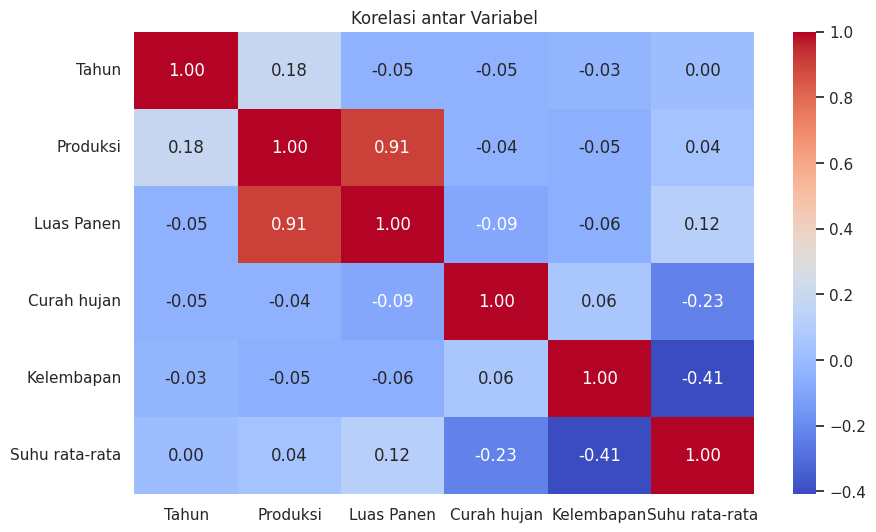

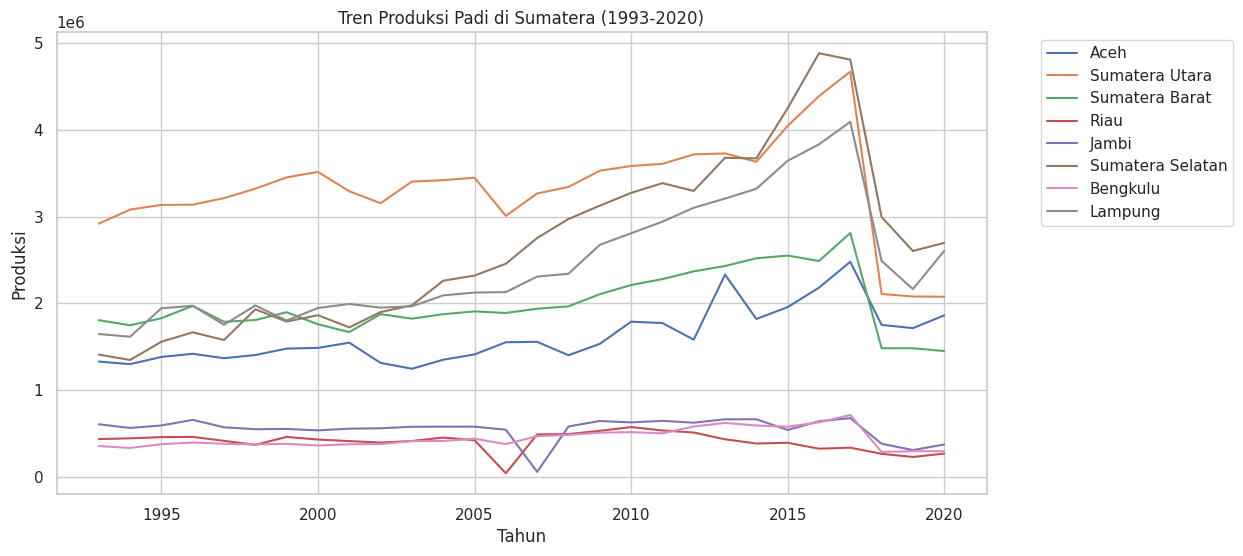

In [3]:
# Cek informasi dasar
print("--- Informasi Dataset ---")
print(df.info())

# Cek statistik deskriptif
print("\n--- Statistik Deskriptif ---")
print(df.describe())

# Visualisasi Korelasi
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi antar Variabel")
plt.show()

# Visualisasi Tren Produksi per Tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Tahun', y='Produksi', hue='Provinsi')
plt.title("Tren Produksi Padi di Sumatera (1993-2020)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
# 1. Menghapus Data Duplikat (jika ada)
df.drop_duplicates(inplace=True)

# 2. Menangani Data Kosong (Missing Values)
# Berdasarkan df.info() sebelumnya, dataset ini cenderung bersih.
# Namun kita tambahkan fungsi ini sebagai langkah jaga-jaga.
df = df.dropna()

# 3. Encoding Data Kategorikal (Kolom Provinsi)
# Karena model regresi membutuhkan input angka, kita ubah nama provinsi menjadi numerik.
le = LabelEncoder()
df['Provinsi'] = le.fit_transform(df['Provinsi'])

# 4. Memisahkan Fitur (X) dan Target (y)
# Target adalah 'Produksi', sisanya adalah fitur (Tahun, Luas Panen, Curah hujan, Kelembapan, Suhu rata-rata)
X = df.drop(columns=['Produksi'])
y = df['Produksi']

# 5. Normalisasi / Standarisasi Fitur
# Langkah ini penting agar variabel dengan rentang besar (seperti Luas Panen) tidak mendominasi variabel kecil.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membuat kembali DataFrame dari hasil scaling untuk disimpan
df_cleaned = pd.DataFrame(X_scaled, columns=X.columns)
df_cleaned['Produksi'] = y.values  # Gabungkan kembali target

# 6. Menyimpan Dataset yang Sudah Dibersihkan
# File ini akan digunakan untuk proses training di MLflow dan GitHub Actions.
output_filename = 'padi_preprocessing.csv'
df_cleaned.to_csv(output_filename, index=False)

print(f"Dataset berhasil dibersihkan dan disimpan sebagai: {output_filename}")
print(f"Struktur kolom hasil preprocessing: {df_cleaned.columns.tolist()}")

Dataset berhasil dibersihkan dan disimpan sebagai: padi_preprocessing.csv
Struktur kolom hasil preprocessing: ['Provinsi', 'Tahun', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata', 'Provinsi_Enc', 'Produksi']
